---
<div style="text-align: center; background-color: #f0f0f0; padding: 20px; border-radius: 10px;">
<p style="text-align: center;"> Конспект лекцій з предмету: </p>
<p style="text-align: center;"><b> "Основи радіоелектроніки" </b></p>
<p style="text-align: center;"> Національний університет “Чернігівська політехніка”
</p>
</div>

---

---
<p style="text-align: center;"> <b>Зміст</b></p>

* [Перехідні процеси в лінійних електричних ланцюгах](#commutation-law)
    * [Перший закон комутації](#first-commutation-law)
    * [Другий закон комутації](#second-commutation-law)
    * [Розрахунок перехідного процесу RL ланцюга](#RL-comutation-calculation-classic)
    * [Розрахунок перехідного процесу RC ланцюга](#RC-comutation-calculation-classic)
* [Операторний метод розрахунку перехідних процесів](#Comutation-calculation-laplace)
    * [Закони Кірхгофа в операторної формі](#Laplace-laws)
    * [Властивості перетворення Лапласа](#Laplace-properties)
    * [Правила переходу від оригіналу до зображення](#Laplace-transform-law)
    * [Розрахунок перехідного процесу RC ланцюга операторним методом](#RC-comutation-calculation-laplace)
* [Перехідні процеси другого порядку](#Comutation-calculation-2nd-order)
     * [Розрахунок паралельного включення RLC](#RLC-series-comutation-calculation-classic)
     * [Розрахунок паралельного включення RLC](#RLC-parallel-comutation-calculation-classic)
* [Ряди Фурье](#Fourier_series)
     * [Узагальнений ряд Фур'є](#Fourier_series_basic)
     * [Тригонометричний ряд Фур'є](#Fourier_series_trig)
     * [Тригонометричний ряд Фур'є з полярними координатами](#Fourier_series_polar)
     * [Комплексна форма ряду Фур'є](#Fourier_series_complex)
     * [Приклад розрахунку тригонометричного ряду Фурьє](#Fourier_series_trig_example)
     * [Приклад розрахунку тригонометричного ряду Фурьє](#Fourier_series_trig_example)
     * [Приклад використання дискретного перетворення Фурьє для отримання спектру сигналу з мікрофона](#Fourier_transform_discrete_microphone)
 
---

In [60]:
from sympy import *
from sympy import symbols, Matrix
from sympy.plotting.plot import MatplotlibBackend, Plot
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
%matplotlib inline

import math
from engineering_notation import EngNumber
import matplotlib.pyplot as plt
from matplotlib.widgets import Cursor
from matplotlib.pyplot import semilogx
from matplotlib import pyplot
%matplotlib inline

import PySpice.Logging.Logging as Logging
logger = Logging.setup_logging()

from PySpice.Doc.ExampleTools import find_libraries
from PySpice.Probe.Plot import plot
from PySpice.Spice.Library import SpiceLibrary
from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *

import sympy as smp
import numpy as np

## Закони Кірхгофа

### Перший закон

> Алгебраїчна сума струмів, які сходяться у вузлі електричного кола рівна нулю

### Другий закон

> Алгебраїчна сума ЕРС в замкненому контурі рівна алгебраїчній сумі падінь напруг на всіх опорах цього контуру


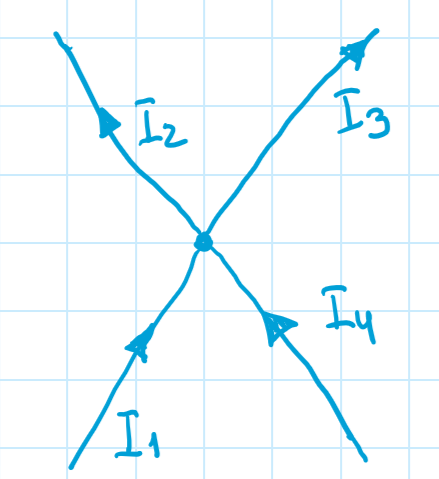

Запишемо рівняння вузла у відповідності до першого закону:

$I_1 - I_2 - I_3 + I_4 = 0$

Перенесено струми,які виходять з вузла в праву частину:

$I_1 + I_4 = I_2 + I_3$

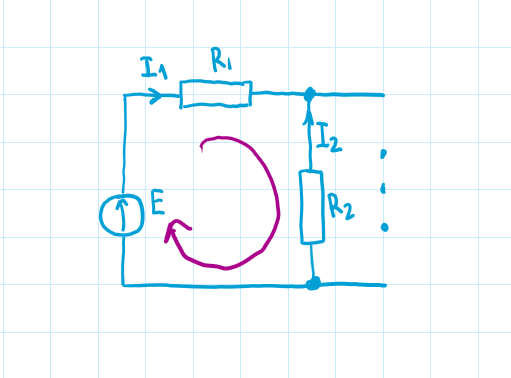

Запишемо рівняння у відповідності до другого закону
 
 $$ I_1 \cdot R_1 - I_2 \cdot R_2 = E $$

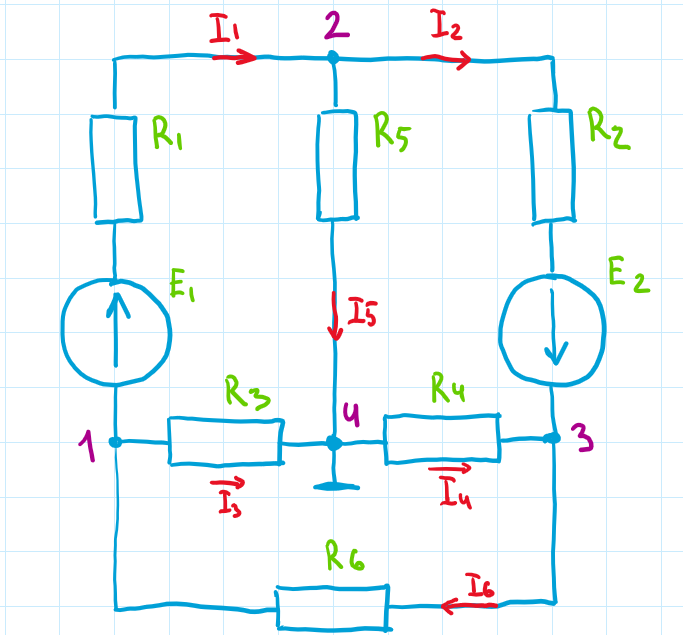

Запишемо рівнянні потенціалів вузлів відносно нульового потунціалу вузла 4

$$ \varphi_2 = \varphi_1 + E_1 - I_1 \cdot R_1 $$
$$ \varphi_3 = \varphi_2 - I_2 \cdot R_2 + E_2 $$
$$ \varphi_1 = \varphi_3 - I_6 \cdot R_6 $$
$$ \varphi_1 = I_3 \cdot R_3 $$
$$ \varphi_2 = I_5 \cdot R_5 $$
$$ \varphi_3 = -I_4 \cdot R_4$$

Запишемо рівняння відносно струмів

$$ I_1 = (\varphi_1 - \varphi_2 + E_1) / R_1 $$

$$ I_2 = (\varphi_2 - \varphi_3 + E_2 )/R_2$$

$$ I_6 = (\varphi_3 -\varphi_1) / R_6 $$

$$ I_3 = \varphi_1 / R_3 $$

$$ I_5 = \varphi_2 / R_5 $$

$$ I_4 = -\varphi_3 / R_4$$

Запишемо рівняння з використанням провідностей

$$ I_1 = (\varphi_1 - \varphi_2 + E_1) \cdot g_1 $$

$$ I_2 = (\varphi_2 - \varphi_3 + E_2 ) \cdot g_2$$

$$ I_6 = (\varphi_3 -\varphi_1) \cdot g_6 $$

$$ I_3 = \varphi_1 \cdot g_3 $$

$$ I_5 = \varphi_2 \cdot g_5 $$

$$ I_4 = -\varphi_3 \cdot g_4$$

Запишемо рівняння для візлів схеми у відповідності до першого закону Кірхгофа

$$ I_6 - I_3 - I_1 = 0 $$

$$ I_1 - I_2 - I_5 = 0 $$

$$ I_2 + I_4 - I_6 = 0 $$

Підставляємо значення струмів

$$ (\varphi_3 -\varphi_1) \cdot g_6 - \varphi_1 \cdot g_3 - (\varphi_1 - \varphi_2 + E_1) \cdot g_1 = 0 $$

$$ (\varphi_1 - \varphi_2 + E_1) \cdot g_1 - (\varphi_2 - \varphi_3 + E_2 ) \cdot g_2 - \varphi_2 \cdot g_5 = 0 $$

$$ (\varphi_2 - \varphi_3 + E_2 ) \cdot g_2 -\varphi_3 \cdot g_4 - (\varphi_3 -\varphi_1) \cdot g_6 = 0 $$

Розкриваємо дужки

$$ \varphi_3\cdot g_6 -\varphi_1\cdot g_6 - \varphi_1 \cdot g_3 - \varphi_1 \cdot g_1 - \varphi_2 \cdot g_1 + E_1 \cdot g_1 = 0 $$

$$ \varphi_1\cdot g_1 - \varphi_2 \cdot g_1 + E_1 \cdot g_1 - \varphi_2\cdot g_2 - \varphi_3\cdot g_2 + E_2\cdot g_2 - \varphi_2 \cdot g_5 = 0 $$

$$ \varphi_2\cdot g_2 - \varphi_3\cdot g_2 + E_2\cdot g_2 -\varphi_3 \cdot g_4 - \varphi_3\cdot g_6 -\varphi_1\cdot g_6 = 0 $$

Перенесемо значення потенціалів вліво і згрупуємо

$$ \varphi_1 \cdot (g_3 + g_1 + g_6) - \varphi_2 \cdot g_1 - \varphi_3\cdot g_6 = - E_1 \cdot g_1 $$

$$ -\varphi_1\cdot g_1 - \varphi_2 \cdot ( g_1 + g_2 + g_5) - \varphi_3\cdot g_2 = E_1 \cdot g_1 - E_2\cdot g_2 $$

$$ -\varphi_1\cdot g_6 - \varphi_2\cdot g_2 + \varphi_3 \cdot (g_2 + g_4 + g_6) = E_2\cdot g_2 $$


> **Власна провідність вузла** визначається як сума провідностей всіх гілок дотичних до данного вузла

$$ g_{11} = g_{1} + g_{3} + g_{6} $$

$$ g_{22} = g_{1} + g_{5} + g_{2} $$

$$ g_{33} = g_{2} + g_{4} + g_{6} $$

> **Міжвузлова провідність** рівна провідності гілки, яка зв'язує два вказаних вузли. ЇЇ значення від'ємне

$$ g_{12} = g_{21} = -g_1 $$

$$ g_{23} = g_{32} = -g_2 $$

$$ g_{31} = g_{13} = -g_6 $$

> **Власний струм вузла** рівний алгебраїчній сумі добутку провідностей гілок на ЕРС гілок, дотичних до данного вузла

$$ J_1 = - E_1 \cdot g_1 $$

$$ J_2 = E_1 \cdot g_1 - E_2 \cdot g_2 $$

$$ J_3 = E_2 \cdot g_2 $$

Виконаємо заміни:

$$ \varphi_1 \cdot g_{11} + \varphi_2 \cdot g_{12} + \varphi_3\cdot g_{13} = J_1 $$

$$ \varphi_1 \cdot g_{21} - \varphi_2 \cdot g_{22} - \varphi_3\cdot g_{23} = J_2 $$

$$ \varphi_1 \cdot g_{31} + \varphi_2 \cdot g_{32} + \varphi_3\cdot g_{33} = J_3 $$

## Випадок з двома вузлами

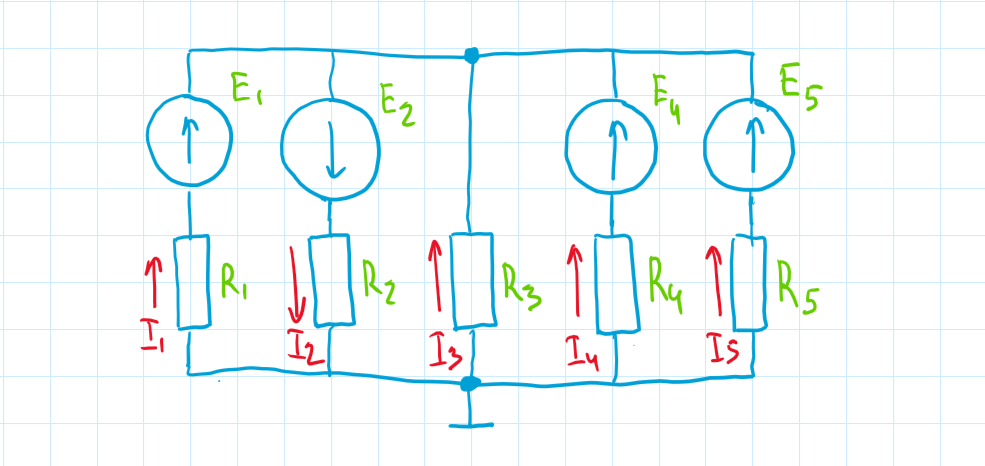

$$ \varphi_1 \cdot g_{11} = J_1 $$

Власна провідність вузла:

$$ g_{11} = g_1 + g_2 + g_3 + g_4 + g_5$$

Власний струм вузла:

$$ J_1 = E_1 \cdot g_1 - E_2 \cdot g_2 + E_4 \cdot g_4 + E_5 \cdot g_5 $$

Виконаємо підстановку:

$$ \varphi_1 \cdot (g_1 + g_2 + g_3 + g_4 + g_5) = E_1 \cdot g_1 - E_2 \cdot g_2 + E_4 \cdot g_4 + E_5 \cdot g_5 $$

Виразимо потенціал вузла:

$$ \varphi_1  = \cfrac{E_1 \cdot g_1 - E_2 \cdot g_2 + E_4 \cdot g_4 + E_5 \cdot g_5}
{g_1 + g_2 + g_3 + g_4 + g_5}$$

В загальному вигляді формула для розрахунку потенціала вузла має наступний вигляд:

   $$ \varphi_1 = \cfrac{\sum_{k=1}^{n} E_{k}\cdot g_{k}}{\sum_{k=1}^{n} g_{k}} $$

Розрахуємо струми в гілках:

$$
\begin{cases} 
I_1 = (E_1 - \varphi_1) \cdot g_1 \\
I_2 = (E_2 + \varphi_1) \cdot g_2 \\
I_3 = (- \varphi_1) \cdot g_3 \\
I_4 = (E_4 - \varphi_1) \cdot g_4 \\
I_5 = (E_5 - \varphi_1) \cdot g_5 
\end{cases} 
$$

In [61]:
# Step 1: Define circuit parameters and initial conditions
E1_s = 40;
E2_s = 20;

R1_s = 10;
R2_s = 40;
R3_s = 10;

E1 = smp.symbols('E1')  # Time symbol
E2 = smp.symbols('E2')  # Time symbol
R1 = smp.symbols('R1')  # Time symbol
R2 = smp.symbols('R2')  # Time symbol
R3 = smp.symbols('R3')  # Time symbol
Phi1 = smp.symbols('Phi1')  # Time symbol

# Step 2: Set up the differential equation
eq = Phi1 * (1/R1 +1/R2 + 1/R3) - E1*(1/R1) + E2*(1/R2)

# Step 3: Solve the differential equation
sol = smp.solve(eq, Phi1)
sol


[R3*(E1*R2 - E2*R1)/(R1*R2 + R1*R3 + R2*R3)]

In [62]:
# Step 4: Convert symbolic solution to a callable function
Phi_func = smp.lambdify([R1, R2,R3,E1,E2], sol, 'numpy')

In [63]:
Phi_func(R1_s, R2_s, R3_s, E1_s, E2_s)

[15.555555555555555]

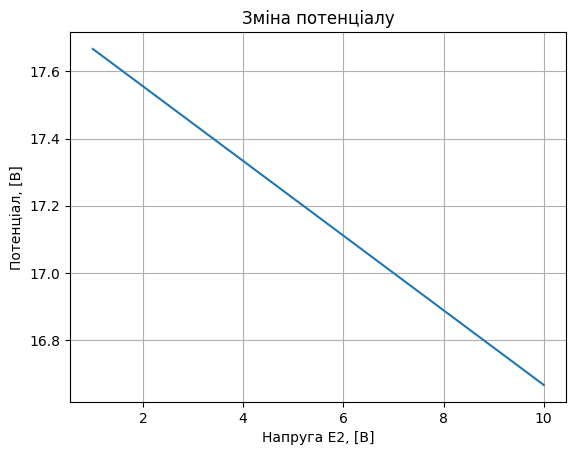

In [64]:
# Step 5: Generate a range of time values
E2_values = np.linspace(1, 10, 10)  # Adjust the range as needed

# Step 6: Evaluate I(t) for each time point
potential_values = np.array([Phi_func(10, R2_s, R3_s, E1_s, E2_sub) for E2_sub in E2_values])

# Step 7: Plot the graph
plt.plot(E2_values, potential_values)
plt.title('Зміна потенціалу')
plt.xlabel('Напруга Е2, [В]')
plt.ylabel('Потенціал, [В]')
plt.grid(True)
plt.show()

### Метод контурних струмів

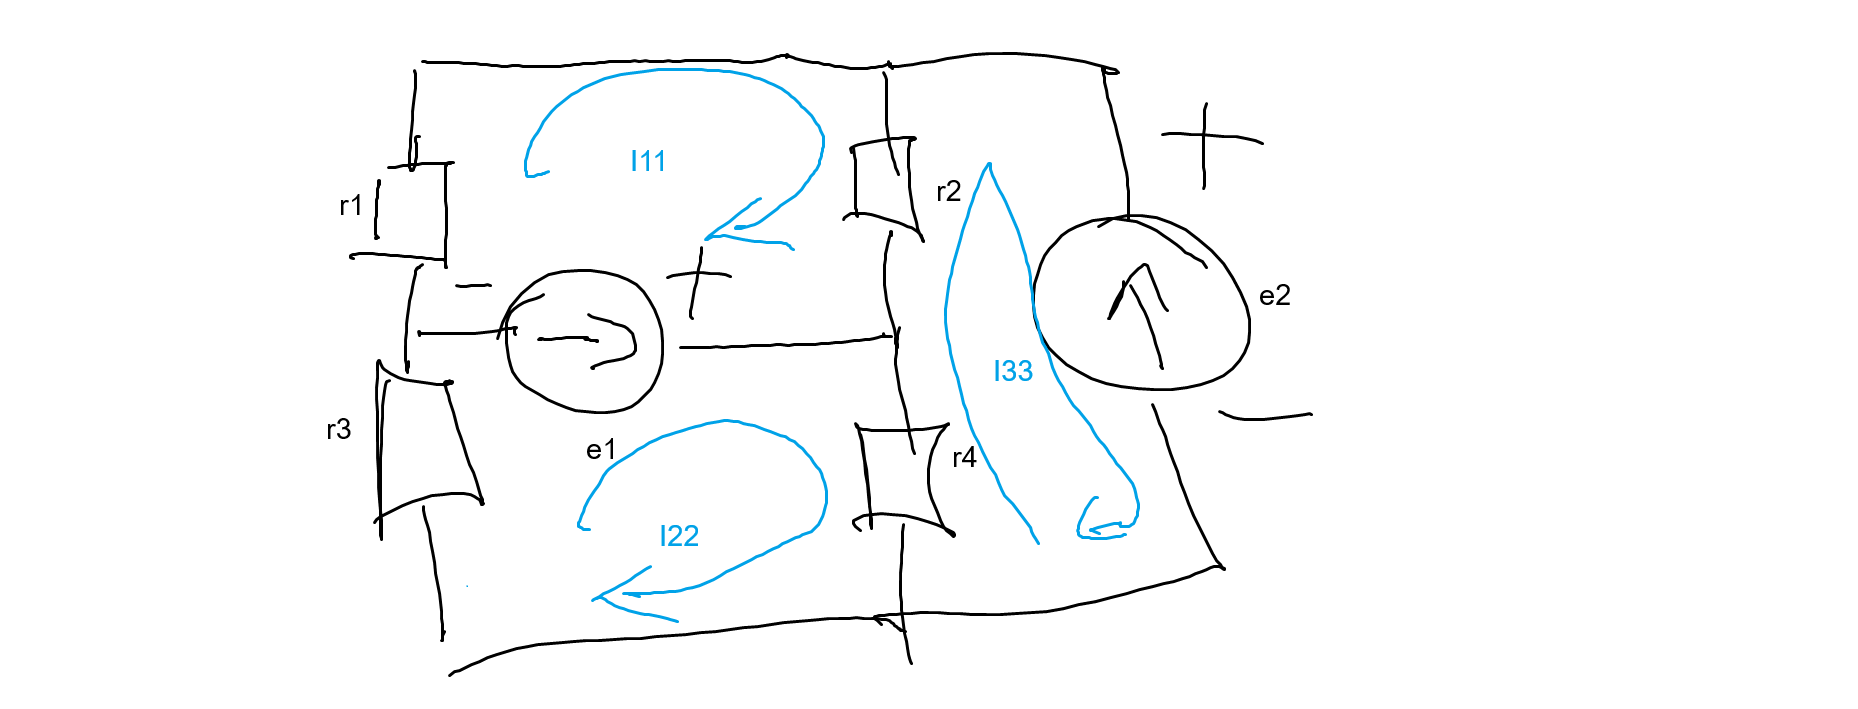

$$ 
\begin{cases} 
I_{11} \cdot (R_1 + R_2) - I_{33} \cdot R_2 = -E_1 \\
I_{22} \cdot (R_3 + R_4) - I_{33} \cdot R_4 = E_1 \\
I_{33} \cdot (R_2 + R_4) - I_{11} \cdot R_2 - I_{22} \cdot R_4 = -E_2
\end{cases}
$$

In [65]:
# Step 1: Define circuit parameters and initial conditions
E1_s = 60;
E2_s = 30;

R1_s = 10;
R2_s = 40;
R3_s = 10;
R4_s = 30;

E1 = smp.symbols('E1')  # Time symbol
E2 = smp.symbols('E2')  # Time symbol
R1 = smp.symbols('R1')  # Time symbol
R2 = smp.symbols('R2')  # Time symbol
R3 = smp.symbols('R3')  # Time symbol
R4 = smp.symbols('R4')  # Time symbol

I11 = smp.symbols('I11')  # Time symbol
I22 = smp.symbols('I22')  # Time symbol
I33 = smp.symbols('I33')  # Time symbol

# Step 2: Set up the differential equation
eq = [I11 * (R1 + R2) - I33 * R2 + E1,  
      I22 * (R3 + R4) - I33 * R4 - E1, 
      I33 * (R2 + R4) - I11 * R2 - I22 * R4 + E2]

# Step 3: Solve the differential equation
sol = smp.solve(eq, [I11, I22, I33])
sol

{I11: (-E1*R2*R3 - E1*R3*R4 - E2*R2*R3 - E2*R2*R4)/(R1*R2*R3 + R1*R2*R4 + R1*R3*R4 + R2*R3*R4),
 I22: (E1*R1*R2 + E1*R1*R4 - E2*R1*R4 - E2*R2*R4)/(R1*R2*R3 + R1*R2*R4 + R1*R3*R4 + R2*R3*R4),
 I33: (E1*R1*R4 - E1*R2*R3 - E2*R1*R3 - E2*R1*R4 - E2*R2*R3 - E2*R2*R4)/(R1*R2*R3 + R1*R2*R4 + R1*R3*R4 + R2*R3*R4)}

In [66]:
print(sol[I11].subs(E1, E1_s).subs(E2, E2_s).subs(R1, R1_s).subs(R2, R2_s).subs(R3, R3_s).subs(R4, R4_s))
print(sol[I22].subs(E1, E1_s).subs(E2, E2_s).subs(R1, R1_s).subs(R2, R2_s).subs(R3, R3_s).subs(R4, R4_s))
print(sol[I33].subs(E1, E1_s).subs(E2, E2_s).subs(R1, R1_s).subs(R2, R2_s).subs(R3, R3_s).subs(R4, R4_s))

I11_s = sol[I11].subs(E1, E1_s).subs(E2, E2_s).subs(R1, R1_s).subs(R2, R2_s).subs(R3, R3_s).subs(R4, R4_s)
I22_s = sol[I22].subs(E1, E1_s).subs(E2, E2_s).subs(R1, R1_s).subs(R2, R2_s).subs(R3, R3_s).subs(R4, R4_s)
I33_s = sol[I33].subs(E1, E1_s).subs(E2, E2_s).subs(R1, R1_s).subs(R2, R2_s).subs(R3, R3_s).subs(R4, R4_s)

-90/31
-3/31
-66/31


In [67]:
print(-90/31)
print(-3/31)
print(-66/31)

-2.903225806451613
-0.0967741935483871
-2.129032258064516


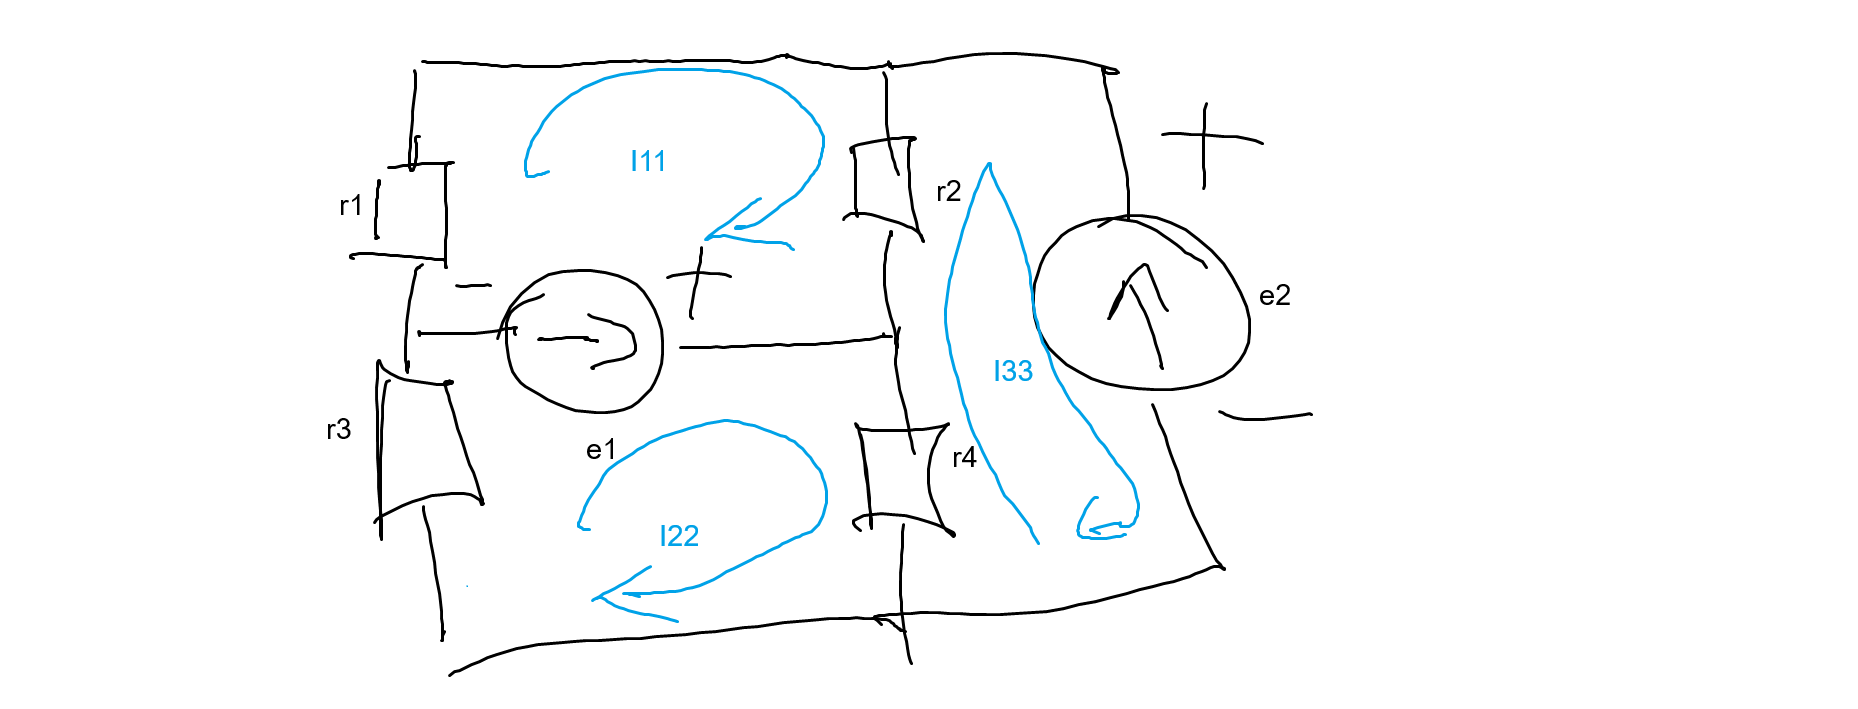

$$
\begin{cases} 
I_1 = I_{11} \\
I_2 = I_{11} - I_{33} \\
I_3 = I_{22} \\
I_4 = I_{22} - I_{33} \\
I_5 = I_{33} \\
I_6 = I_{11} - I_{22}
\end{cases} 
$$

In [68]:
I1 = I11
I2 = I11 - I33
I3 = I22
I4 = I22 - I33
I5 = I33
I6 = I11 - I22

In [69]:
print(I1.subs(I11, I11_s).subs(I22, I22_s).subs(I33, I33_s))
print(I2.subs(I11, I11_s).subs(I22, I22_s).subs(I33, I33_s))
print(I3.subs(I11, I11_s).subs(I22, I22_s).subs(I33, I33_s))
print(I4.subs(I11, I11_s).subs(I22, I22_s).subs(I33, I33_s))
print(I5.subs(I11, I11_s).subs(I22, I22_s).subs(I33, I33_s))
print(I6.subs(I11, I11_s).subs(I22, I22_s).subs(I33, I33_s))

-90/31
-24/31
-3/31
63/31
-66/31
-87/31


In [70]:
print(-90/31)
print(-24/31)
print(-3/31)
print(63/31)
print(-66/31)
print(-87/31)


-2.903225806451613
-0.7741935483870968
-0.0967741935483871
2.032258064516129
-2.129032258064516
-2.806451612903226


$$ I_{11} \cdot ( R_1 + R_2) - I_{22} \cdot R_2 = E_1 - E_2 $$

$$ I_{22} \cdot ( R_2 + R_3) - I_{11} \cdot R_2 = E_2 $$


$$ I_{22} \cdot ( R_2 + R_3) = I_{11} \cdot R_2 + E_2 $$

$$ I_{22} = \cfrac{ I_{11} \cdot R_2 + E_2}{R_2 + R_3} $$




$$ I_{11} \cdot( ( R_1 + R_2) - \cfrac{ R_2 + E_2}{R_2 + R_3} \cdot R_2) = E_1 - E_2 $$


$$ I_{11} = \cfrac{E_1 - E_2}{ ( R_1 + R_2) - \cfrac{ R_2 + E_2}{R_2 + R_3} \cdot R_2} $$

$$ I_{22} \cdot ( R_2 + R_3) = \cfrac{E_1 - E_2}{ ( R_1 + R_2) - \cfrac{ R_2 + E_2}{R_2 + R_3} \cdot R_2} \cdot R_2 + E_2 $$

$$ I_{22} = \cfrac{\cfrac{E_1 - E_2}{ ( R_1 + R_2) - \cfrac{ R_2 + E_2}{R_2 + R_3} \cdot R_2} \cdot R_2 + E_2}{R_2 + R_3} $$

$$ I_1 = I_{11}$$

$$ I_2 = I_{11} - I_{22}$$

$$ I_3 = I_{22}$$
